In [1]:
import torch
import torch.nn as nn
from universalNet import *
import matplotlib.pyplot as plt

In [2]:
# hparams = {'tau': 1,
#            'seed': 42}

# params_dict = {'layer_0':
#                    {'E':
#                         {'n': 7,
#                          'projections': {}}},
#                'layer_1':
#                    {'E':
#                         {'n': 100,
#                          'bias': False,
#                          'activation': 'relu',
#                          'projections': 
#                              {'layer_0':{'E':[]}}}},
#                'layer_2':
#                    {'E':
#                         {'n': 10,
#                          'bias': False,
#                          'activation': 'relu',
#                          'projections':
#                              {'layer_1':{'E':[]}}}}
#                }

# model = universalNet(params_dict, hparams)

100%|██████████| 50/50 [00:00<00:00, 113.72it/s]


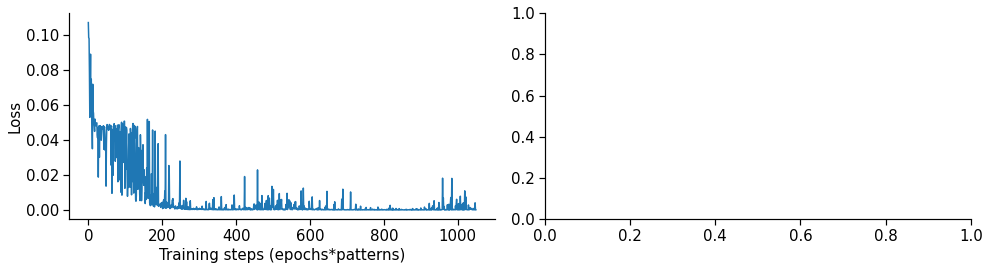

In [3]:
# Initialize network
model = universalNet(input_size = 7,
                     tau = 1,
                     seed = 42)
# print(model)
# print(vars(model))

# Train network
all_patterns = n_hot_patterns(n=2,length=7)
all_targets = torch.eye(21)

model.train(num_epochs = 50,
            all_patterns = all_patterns,
            all_targets = all_targets,
            lr = 0.01,
            num_timesteps = 1,
            plot = True)